### [과제] 경기선행지수순환변동치와 한국종합주가지수(KOSPI)와의 상관관계를 분석하시오.

 

1) 데이터 : 첨부파일 참조(2010.1 ~ 2020.4)

2) 분석기간 : 분석자가 임의설정(최소 48개월 이상)

3) 종합주가지수 : 월말종가 또는 월평균지수(분석자가 임의 선정)

4) 통계패키지 : R, SAS, SPSS, EXCEL 등 분석자가 사용가능한 프로그램 사용

5) 기타 : 경기선행지수순환변동치와 KOSPI의 시차를 조정(KOSPI를 6개월 선행)하여

분석해 볼 것

 

** 제출기한 : 2020.12.4(금)

** 제출방법 : 교육시스템에 워드나 한글파일로 업로드

## 1. Import packages

In [1]:
import pandas as pd
import datetime
import calendar

## 2. Read csv files and Data preprocessing

### 2-1. 경기선행지수순환변동치 - CYC

In [2]:
cyc = pd.read_csv("경기선행지수순환변동치_201001_202004.csv", encoding='cp949')

In [3]:
# transpose
cyc = cyc.T
cyc

,0
지수별,선행지수 순환변동치
2010. 01,102.4
2010. 02,102.3
2010. 03,102.1
2010. 04,101.9
...,...
2019. 12,100.2
2020. 01,100.3
2020. 02 p),100.2
2020. 03 p),99.6


In [4]:
# remove header
cyc = cyc[1:]
cyc

,0
2010. 01,102.4
2010. 02,102.3
2010. 03,102.1
2010. 04,101.9
2010. 05,101.9
...,...
2019. 12,100.2
2020. 01,100.3
2020. 02 p),100.2
2020. 03 p),99.6


In [5]:
# indexing
date = cyc.index
index = []
for i in range(len(cyc)):
    index.append(i)
cyc.index = index

In [6]:
cyc['date'] = date

<ipython-input-6-f93ecd18f244>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyc['date'] = date


In [7]:
cyc

,0,date
0,102.4,2010. 01
1,102.3,2010. 02
2,102.1,2010. 03
3,101.9,2010. 04
4,101.9,2010. 05
...,...,...
119,100.2,2019. 12
120,100.3,2020. 01
121,100.2,2020. 02 p)
122,99.6,2020. 03 p)


In [8]:
# rename columns
cyc.columns = ['cyc', 'date']

In [9]:
cyc

,cyc,date
0,102.4,2010. 01
1,102.3,2010. 02
2,102.1,2010. 03
3,101.9,2010. 04
4,101.9,2010. 05
...,...,...
119,100.2,2019. 12
120,100.3,2020. 01
121,100.2,2020. 02 p)
122,99.6,2020. 03 p)


In [10]:
cyc = cyc[['date', 'cyc']]

In [11]:
cyc

,date,cyc
0,2010. 01,102.4
1,2010. 02,102.3
2,2010. 03,102.1
3,2010. 04,101.9
4,2010. 05,101.9
...,...,...
119,2019. 12,100.2
120,2020. 01,100.3
121,2020. 02 p),100.2
122,2020. 03 p),99.6


In [12]:
# remove special letter 
for i in range(len(cyc)):
    cyc['date'][i] = cyc['date'][i].replace(' p)', '')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
# completed cyc data
cyc

,date,cyc
0,2010. 01,102.4
1,2010. 02,102.3
2,2010. 03,102.1
3,2010. 04,101.9
4,2010. 05,101.9
...,...,...
119,2019. 12,100.2
120,2020. 01,100.3
121,2020. 02,100.2
122,2020. 03,99.6


In [14]:
# String to datetime
for i in range(len(cyc)):
    temp = cyc['date'][i]
    print(temp)
    year = int(temp[0:4])
    month = int(temp[6:8])
    day = calendar.monthrange(year, month)[1]
    temp = temp + "." + str(day)
    print(temp)
    convert_date = datetime.datetime.strptime(temp, "%Y. %m.%d").date()
    cyc['date'][i] = convert_date

2010. 01
2010. 01.31
2010. 02
2010. 02.28
2010. 03
2010. 03.31
2010. 04
2010. 04.30
2010. 05
2010. 05.31
2010. 06
2010. 06.30
2010. 07
2010. 07.31
2010. 08
2010. 08.31
2010. 09
2010. 09.30
2010. 10
2010. 10.31
2010. 11
2010. 11.30
2010. 12
2010. 12.31
2011. 01
2011. 01.31
2011. 02
2011. 02.28
2011. 03
2011. 03.31
2011. 04
2011. 04.30
2011. 05
2011. 05.31
2011. 06
2011. 06.30
2011. 07
2011. 07.31
2011. 08
2011. 08.31
2011. 09
2011. 09.30
2011. 10
2011. 10.31
2011. 11
2011. 11.30
2011. 12
2011. 12.31
2012. 01
2012. 01.31
2012. 02
2012. 02.29
2012. 03
2012. 03.31
2012. 04
2012. 04.30
2012. 05
2012. 05.31
2012. 06
2012. 06.30
2012. 07
2012. 07.31
2012. 08
2012. 08.31
2012. 09
2012. 09.30
2012. 10
2012. 10.31
2012. 11
2012. 11.30
2012. 12
2012. 12.31
2013. 01
2013. 01.31
2013. 02
2013. 02.28
2013. 03
2013. 03.31
2013. 04
2013. 04.30
2013. 05
2013. 05.31
2013. 06
2013. 06.30
2013. 07
2013. 07.31
2013. 08
2013. 08.31
2013. 09
2013. 09.30
2013. 10
2013. 10.31
2013. 11
2013. 11.30
2013. 12
2013

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
cyc

,date,cyc
0,2010-01-31,102.4
1,2010-02-28,102.3
2,2010-03-31,102.1
3,2010-04-30,101.9
4,2010-05-31,101.9
...,...,...
119,2019-12-31,100.2
120,2020-01-31,100.3
121,2020-02-29,100.2
122,2020-03-31,99.6


### 2-2. 한국종합주가지수 - KOSPI

In [16]:
kospi = pd.read_csv("종합주가지수_201001_202004.csv", encoding='cp949')

In [17]:
kospi

,통계표,항목명1,단위,변환,Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,...,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20
0,6.1.2 주식거래 및 주가지수,KOSPI_회사수,사,원자료,771,773,775,770,769,772,...,789,789,789,794,798,799,800,799,798,796
1,6.1.2 주식거래 및 주가지수,KOSPI_종목수,종목,원자료,924,927,928,924,920,921,...,900,901,901,910,914,916,917,916,915,912
2,6.1.2 주식거래 및 주가지수,KOSPI_종가,1980.01.04=100,원자료,"1,602.43","1,594.58","1,692.85","1,741.56","1,641.25","1,698.29",...,"2,024.55","1,967.79","2,063.05","2,083.48","2,087.96","2,197.67","2,119.01","1,987.01","1,754.64","1,947.56"
3,6.1.2 주식거래 및 주가지수,KOSPI_평균,1980.01.04=100,원자료,"1,682.16","1,598.96","1,665.50","1,730.29","1,648.30","1,691.94",...,"2,079.48","1,944.24","2,045.21","2,065.75","2,128.79","2,147.01","2,203.44","2,167.12","1,786.75","1,849.59"
4,6.1.2 주식거래 및 주가지수,KOSDAQ_종가,1996.07.01=1000,원자료,496.57,507.03,515.74,523.75,489.42,489.98,...,630.18,610.55,621.76,658.52,632.99,669.83,642.48,610.73,569.07,645.18
5,6.1.2 주식거래 및 주가지수,KOSDAQ_평균,1996.07.01=1000,원자료,535.44,505.32,518.7,512.86,497.85,493.3,...,667.48,595.05,632.96,644.97,656.89,640.54,671.12,667.3,549.44,615.6
6,6.1.2 주식거래 및 주가지수,KOSDAQ_상장주식 회전율,%,원자료,81.1,64.03,80.12,56.51,50.36,43.72,...,48.27,42.6,40.22,48.96,56.32,42.82,50.79,64.23,75.55,86.33


In [18]:
# Remove unnecessary columns
del kospi['통계표']
del kospi['단위']
del kospi['변환']

In [19]:
kospi = kospi.T

In [20]:
kospi = kospi[1:]

In [21]:
# indexing
date = kospi.index
index = []
for i in range(len(kospi)):
    index.append(i)
kospi.index = index

In [22]:
kospi

,0,1,2,3,4,5,6
0,771,924,"1,602.43","1,682.16",496.57,535.44,81.1
1,773,927,"1,594.58","1,598.96",507.03,505.32,64.03
2,775,928,"1,692.85","1,665.50",515.74,518.7,80.12
3,770,924,"1,741.56","1,730.29",523.75,512.86,56.51
4,769,920,"1,641.25","1,648.30",489.42,497.85,50.36
...,...,...,...,...,...,...,...
119,799,916,"2,197.67","2,147.01",669.83,640.54,42.82
120,800,917,"2,119.01","2,203.44",642.48,671.12,50.79
121,799,916,"1,987.01","2,167.12",610.73,667.3,64.23
122,798,915,"1,754.64","1,786.75",569.07,549.44,75.55


In [23]:
kospi['date'] = date

In [24]:
kospi

,0,1,2,3,4,5,6,date
0,771,924,"1,602.43","1,682.16",496.57,535.44,81.1,Jan-10
1,773,927,"1,594.58","1,598.96",507.03,505.32,64.03,Feb-10
2,775,928,"1,692.85","1,665.50",515.74,518.7,80.12,Mar-10
3,770,924,"1,741.56","1,730.29",523.75,512.86,56.51,Apr-10
4,769,920,"1,641.25","1,648.30",489.42,497.85,50.36,May-10
...,...,...,...,...,...,...,...,...
119,799,916,"2,197.67","2,147.01",669.83,640.54,42.82,Dec-19
120,800,917,"2,119.01","2,203.44",642.48,671.12,50.79,Jan-20
121,799,916,"1,987.01","2,167.12",610.73,667.3,64.23,Feb-20
122,798,915,"1,754.64","1,786.75",569.07,549.44,75.55,Mar-20


In [25]:
kospi = kospi[['date', 2, 3]]

In [26]:
kospi.columns = ['date', 'kospi_cp', 'kospi_avg']

In [27]:
# String to datetime
for i in range(len(kospi)):
    temp = kospi['date'][i]
    temp_d = datetime.datetime.strptime(temp, "%b-%y").date()
    year = temp_d.year
    month = temp_d.month
    print(year, month)
    day = calendar.monthrange(year, month)[1]
    temp = temp + "-" + str(day)
    convert_date = datetime.datetime.strptime(temp, "%b-%y-%d").date()
    print(convert_date)
    kospi['date'][i] = convert_date

2010 1
2010-01-31
2010 2
2010-02-28
2010 3
2010-03-31
2010 4
2010-04-30
2010 5
2010-05-31
2010 6
2010-06-30
2010 7
2010-07-31
2010 8
2010-08-31
2010 9
2010-09-30
2010 10
2010-10-31
2010 11
2010-11-30
2010 12
2010-12-31
2011 1
2011-01-31
2011 2
2011-02-28
2011 3
2011-03-31
2011 4
2011-04-30
2011 5
2011-05-31
2011 6
2011-06-30
2011 7
2011-07-31
2011 8
2011-08-31
2011 9
2011-09-30
2011 10
2011-10-31
2011 11
2011-11-30
2011 12
2011-12-31
2012 1
2012-01-31
2012 2
2012-02-29
2012 3
2012-03-31
2012 4
2012-04-30
2012 5
2012-05-31
2012 6
2012-06-30
2012 7
2012-07-31
2012 8
2012-08-31
2012 9
2012-09-30
2012 10
2012-10-31
2012 11
2012-11-30
2012 12
2012-12-31
2013 1
2013-01-31
2013 2
2013-02-28
2013 3
2013-03-31
2013 4
2013-04-30
2013 5
2013-05-31
2013 6
2013-06-30
2013 7
2013-07-31
2013 8
2013-08-31
2013 9
2013-09-30
2013 10
2013-10-31
2013 11
2013-11-30
2013 12
2013-12-31
2014 1
2014-01-31
2014 2
2014-02-28
2014 3
2014-03-31
2014 4
2014-04-30
2014 5
2014-05-31
2014 6
2014-06-30
2014 7
2014-07-3

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
kospi

,date,kospi_cp,kospi_avg
0,2010-01-31,"1,602.43","1,682.16"
1,2010-02-28,"1,594.58","1,598.96"
2,2010-03-31,"1,692.85","1,665.50"
3,2010-04-30,"1,741.56","1,730.29"
4,2010-05-31,"1,641.25","1,648.30"
...,...,...,...
119,2019-12-31,"2,197.67","2,147.01"
120,2020-01-31,"2,119.01","2,203.44"
121,2020-02-29,"1,987.01","2,167.12"
122,2020-03-31,"1,754.64","1,786.75"


### 2-3. 데이터셋 하나로 통일하기

In [29]:
kospi['cyc'] = cyc['cyc']

<ipython-input-29-f376c3a7f186>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi['cyc'] = cyc['cyc']


In [30]:
kos_cyc = kospi

In [31]:
kos_cyc.set_index('date', inplace=True)

In [32]:
kos_cyc

,kospi_cp,kospi_avg,cyc
date,,,
2010-01-31,"1,602.43","1,682.16",102.4
2010-02-28,"1,594.58","1,598.96",102.3
2010-03-31,"1,692.85","1,665.50",102.1
2010-04-30,"1,741.56","1,730.29",101.9
2010-05-31,"1,641.25","1,648.30",101.9
...,...,...,...
2019-12-31,"2,197.67","2,147.01",100.2
2020-01-31,"2,119.01","2,203.44",100.3
2020-02-29,"1,987.01","2,167.12",100.2


In [33]:
# 컬럼 타입 변경
for i in range(len(kos_cyc)):
    kos_cyc['kospi_cp'][i] = kos_cyc['kospi_cp'][i].replace(',', '')
    kos_cyc['kospi_avg'][i] = kos_cyc['kospi_avg'][i].replace(',', '')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
kos_cyc = kos_cyc.astype({'kospi_cp':'float', 'kospi_avg': 'float', 'cyc' : 'float'})

In [35]:
kos_cyc.dtypes

kospi_cp     float64
kospi_avg    float64
cyc          float64
dtype: object

## 3. Correlation Analysis

추후에 해볼 것들
기간 재설정 --> 코로나 영향이 적은 2019.11월 데이터까지만 이용해서 해보기
1. 그래프 시각화 (상관분석 전)
2. 상관분석 결과 간단 해석
3. kospi 를 앞당겨서 분석해보기 
4. 결과해석 
5. 주석 및 코드 정리 후
6. 워드에 결과 옮겨서 제출


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

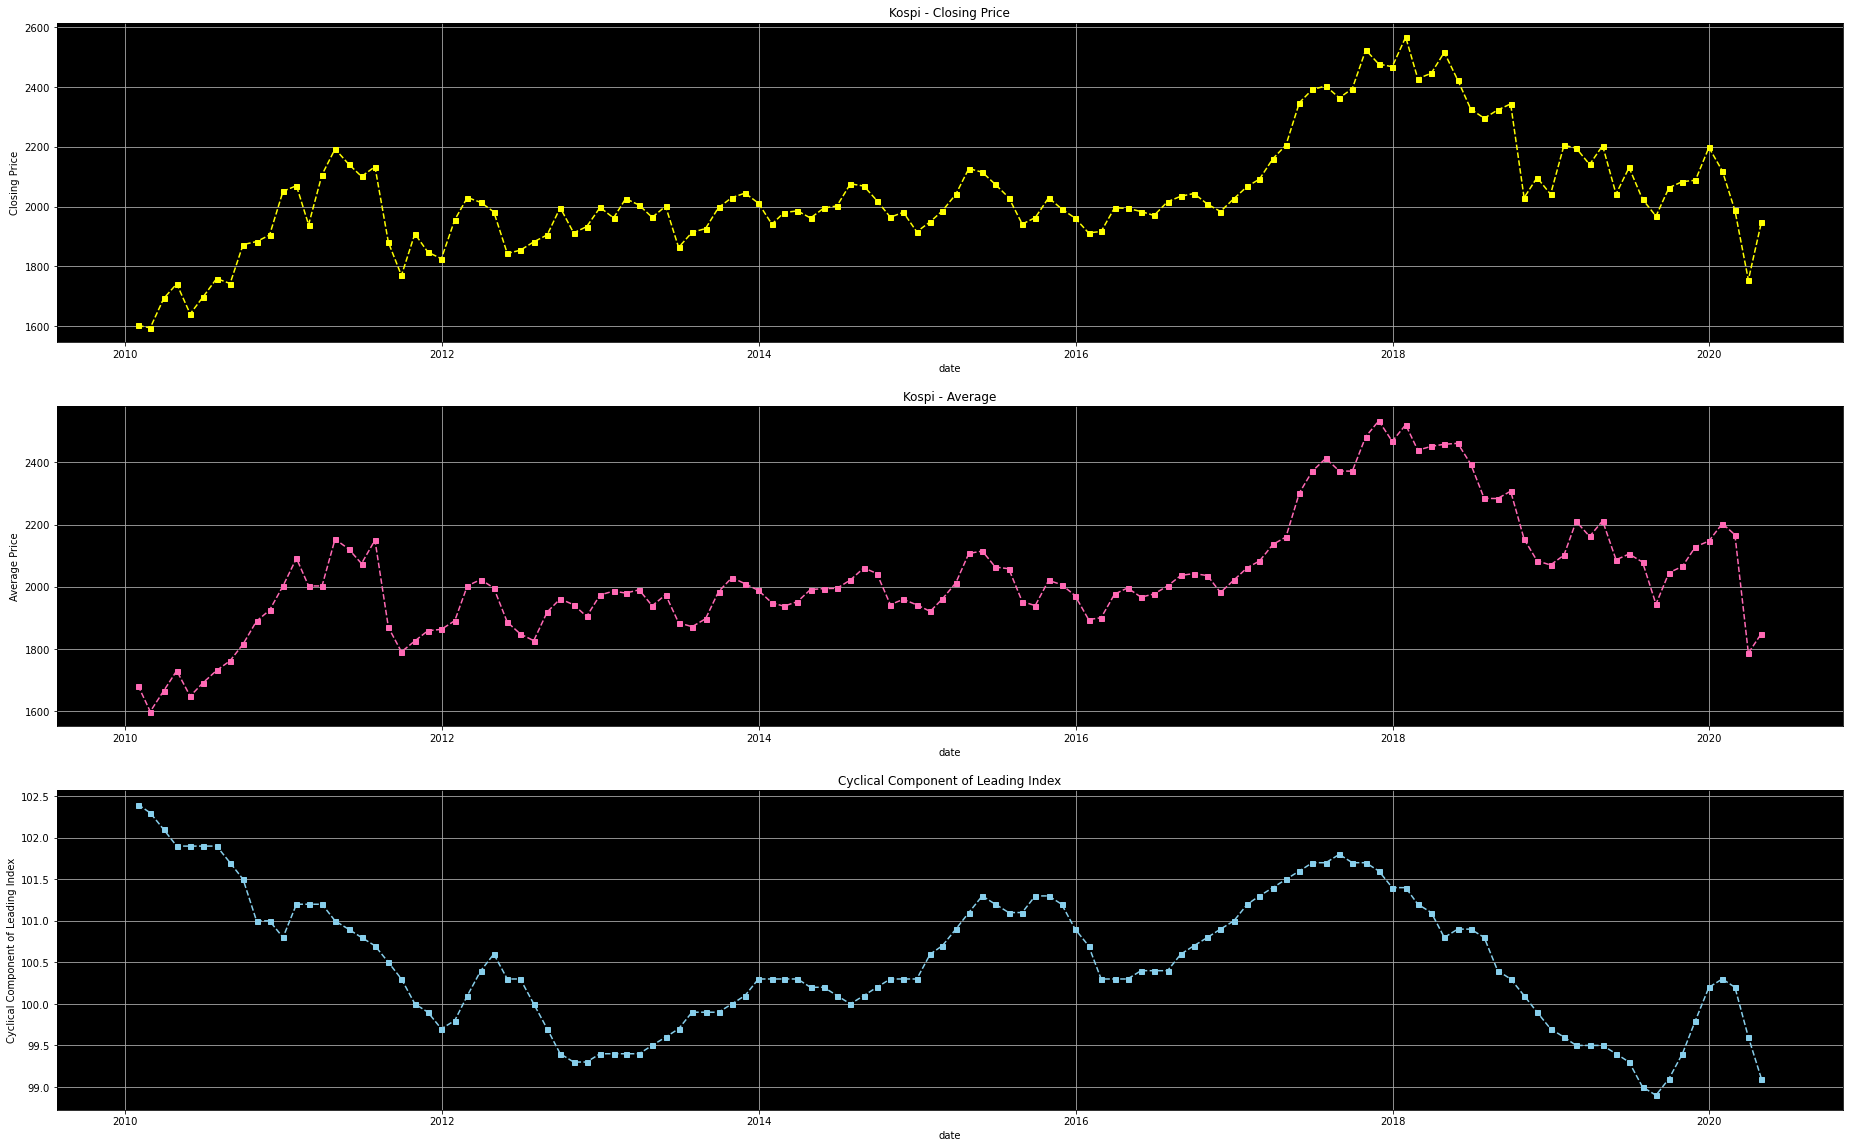

In [104]:
plt.figure(figsize=(32, 20))

plt.subplot(3,1,1) 
plt.title("Kospi - Closing Price")
plt.plot(kos_cyc.index, kos_cyc.kospi_cp, linestyle='dashed', marker='s',
     markerfacecolor='yellow', markersize=5, color="yellow")
plt.xlabel("date")
plt.ylabel("Closing Price")
plt.grid()
ax = plt.gca()
ax.set_facecolor('black')

plt.subplot(3,1,2) 
plt.title("Kospi - Average")
plt.plot(kos_cyc.index, kos_cyc.kospi_avg, linestyle='dashed', marker='s',
     markerfacecolor='hotpink', markersize=5, color="hotpink")
plt.xlabel("date")
plt.ylabel("Average Price")
plt.grid()
ax = plt.gca()
ax.set_facecolor('black')

plt.subplot(3,1,3) 
plt.title("Cyclical Component of Leading Index")
plt.plot(kos_cyc.index, kos_cyc.cyc, linestyle='dashed', marker='s',
     markerfacecolor='skyblue', markersize=5, color="skyblue")
plt.xlabel("date")
plt.ylabel("Cyclical Component of Leading Index")
plt.grid()
ax = plt.gca()
ax.set_facecolor('black')

plt.show()

In [110]:
kos_cyc.corr()

,kospi_cp,kospi_avg,cyc
kospi_cp,1.000000,0.978682,0.106790
kospi_avg,0.978682,1.000000,0.114164
cyc,0.106790,0.114164,1.000000


In [112]:
# https://m.blog.naver.com/PostView.nhn?blogId=parksehoon1971&logNo=221576394512&proxyReferer=https:%2F%2Fwww.google.com%2F
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(kos_cyc48.kospi_avg, kos_cyc48.cyc)
corr

(0.6168727111291235, 2.3572252639356503e-06)

In [111]:
rho = stats.spearmanr(kos_cyc48.kospi_avg, kos_cyc48.cyc)
rho

SpearmanrResult(correlation=0.540839112588541, pvalue=6.020510207759935e-05)

### kospi를 6개월 선행하여 만들어보기

In [114]:
cyc = kos_cyc[['cyc']]

In [115]:
kospi_cp = kos_cyc[['kospi_cp']]

In [146]:
cyc6 = cyc[70:118]
print(len(cyc6))
cyc6

48


,cyc
date,
2015-11-30,101.2
2015-12-31,100.9
2016-01-31,100.7
2016-02-29,100.3
2016-03-31,100.3
2016-04-30,100.3
2016-05-31,100.4
2016-06-30,100.4
2016-07-31,100.4


In [147]:
kospi6 = kospi_cp[76:]
print(len(kospi6))
kospi6

48


,kospi_cp
date,
2016-05-31,1983.40
2016-06-30,1970.35
2016-07-31,2016.19
2016-08-31,2034.65
2016-09-30,2043.63
2016-10-31,2008.19
2016-11-30,1983.48
2016-12-31,2026.46
2017-01-31,2067.57


In [151]:
#피어슨 상관계수 검정
corr = stats.pearsonr(cyc6.cyc, kospi6.kospi_cp)
corr

(0.750333210965825, 8.265155390684165e-10)

In [152]:
# 스피어만 상관계수 검정
rho = stats.spearmanr(cyc6.cyc, kospi6.kospi_cp)
rho

SpearmanrResult(correlation=0.7288057430228526, pvalue=4.280949993465952e-09)